1. Plot the populations for the years in the period. Add legend and axis labels to the plot.

[[ 1900 30000  4000 48300]
 [ 1901 47200  6100 48200]
 [ 1902 70200  9800 41500]
 [ 1903 77400 35200 38200]
 [ 1904 36300 59400 40600]
 [ 1905 20600 41700 39800]
 [ 1906 18100 19000 38600]
 [ 1907 21400 13000 42300]
 [ 1908 22000  8300 44500]
 [ 1909 25400  9100 42100]
 [ 1910 27100  7400 46000]
 [ 1911 40300  8000 46800]
 [ 1912 57000 12300 43800]
 [ 1913 76600 19500 40900]
 [ 1914 52300 45700 39400]
 [ 1915 19500 51100 39000]
 [ 1916 11200 29700 36700]
 [ 1917  7600 15800 41800]
 [ 1918 14600  9700 43300]
 [ 1919 16200 10100 41300]
 [ 1920 24700  8600 47300]]


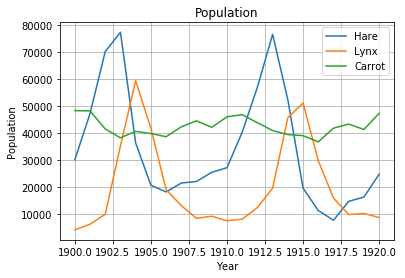

In [175]:
import numpy as np
import matplotlib.pyplot as plt

url = 'http://scipy-lectures.org/_downloads/populations.txt'
data = np.loadtxt(url, delimiter='	', dtype=int, skiprows=1)
plt.plot(data[:,0],data[:,1: ])

plt.legend(['Hare','Lynx','Carrot'])
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population')
plt.grid()
plt.show()

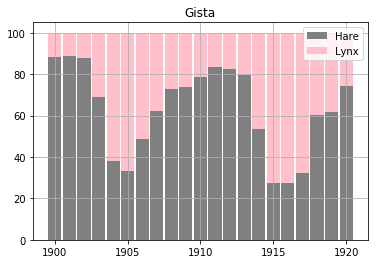

In [209]:
#Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio 
#of each specis for the years in the period.

plt.title('Gista')
bw = 0.5
proc = data[:,1]+data[:,2]

hare = data[:,1]/proc*100
lynx = data[:,2]/proc*100

plt.bar(data[:, 0], label='Hare', width = 0.9, height = hare, color = "grey")
plt.bar(data[:, 0], label='Lynx', width = 0.9, height = lynx, bottom = hare, color = 'pink')
plt.legend(['Hare','Lynx'])

plt.grid()
plt.show()

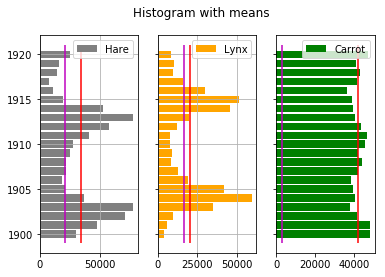

Mean of Hares:    34080.95238095238    Std of Hares:    20897.906458089667
Mean of Lynxes:   20166.666666666668   Std of Lynxes:   16254.591536908763
Mean of Carrots:  42400.0              Std of Carrots:  3322.5062255844787


In [214]:
# Find the mean and std of the populations of each species. Plot the historgam 
#of population for each species and show mean values with vertical line. Arrange 3 subplots in a row.

fig, axs = plt.subplots(1, 3, sharey=True)
fig.suptitle('Histogram with means')
axs[0].barh(data[:, 0], data[:, 1], label='Hare', color = "grey")
axs[0].vlines(np.mean(data[:, 1]), 1899, 1921, colors = 'r')
axs[0].vlines(np.std(data[:, 1]), 1899, 1921, colors = 'm')
axs[0].legend()

axs[1].barh(data[:, 0], data[:, 2], label='Lynx', color = "orange")
axs[1].vlines(np.mean(data[:, 2]), 1899, 1921, colors = 'r')
axs[1].vlines(np.std(data[:, 2]), 1899, 1921, colors = 'm')
axs[1].legend()

axs[2].barh(data[:, 0], data[:, 3], label='Carrot', color ='g')
axs[2].vlines(np.mean(data[:, 3]), 1899, 1921, colors = 'r')
axs[2].vlines(np.std(data[:, 3]), 1899, 1921, colors = 'm')
axs[2].legend()

axs[0].grid()
axs[1].grid()
plt.show()

print("Mean of Hares:   ", np.mean(data[:, 1]), "   Std of Hares:   ", np.std(data[:, 1]))
print("Mean of Lynxes:  ", np.mean(data[:, 2]), "  Std of Lynxes:  ", np.std(data[:, 2]))
print("Mean of Carrots: ", np.mean(data[:, 3]), "             Std of Carrots: ", np.std(data[:, 3]))

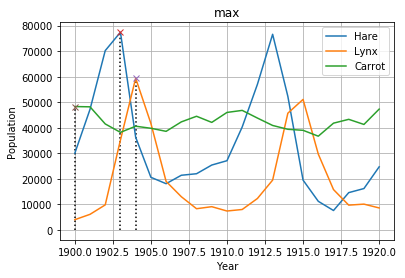

In [129]:
#Find which year each species had the largest population. Mark these years in the plot of populations.

plt.plot(data[:,0],data[:,1: ])

plt.vlines(data[np.argmax(data[:, 1]), 0], 0, data[np.argmax(data[:, 1]), 1], linestyles="dotted")
plt.vlines(data[np.argmax(data[:, 2]), 0], 0, data[np.argmax(data[:, 2]), 2], linestyles="dotted")
plt.vlines(data[np.argmax(data[:, 3]), 0], 0, data[np.argmax(data[:, 3]), 3], linestyles="dotted")
plt.plot(data[np.argmax(data[:, 1]), 0],data[np.argmax(data[:, 1]), 1] , '-x')
plt.plot(data[np.argmax(data[:, 2]), 0],data[np.argmax(data[:, 2]), 2] , '-x')
plt.plot(data[np.argmax(data[:, 3]), 0],data[np.argmax(data[:, 3]), 3] , '-x')

plt.legend(['Hare','Lynx','Carrot'])
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('max')
plt.grid()
plt.show()

['H' 'H' 'H' 'H' 'L' 'L' 'L' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'L' 'L' 'L'
 'H' 'H' 'H']


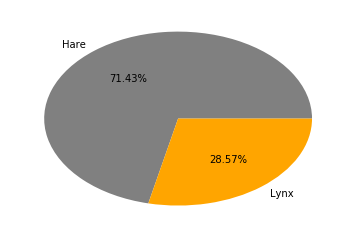

In [120]:
#Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. 
#Plot a pie chart showing ratio of "H" and "L" values obtained.

otvet = np.where(data[:, 1] - data[:, 2] > 0, 'H', 'L')
pc = np.array([len(np.argwhere(otvet == 'H')), len(np.argwhere(otvet == 'L'))])
print(otvet)

plt.pie(pc, labels=(['Hare', 'Lynx']), colors = ['grey','orange'], autopct='%1.2f%%')
plt.show()

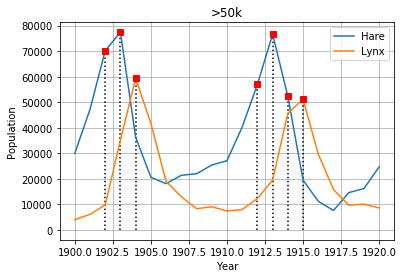

In [202]:
#Find which years any of the populations is above 50000. Show time 
#periods where populations are above 50000 in the plot of populations.

plt.plot(data[:,0],data[:,1: -1])
big1 = np.where(data[:, 1] > 50000)[0]
big2 = np.where(data[:, 2] > 50000)[0]

plt.vlines(data[big1, 0], 0, data[big1, 1], linestyles="dotted")
plt.vlines(data[big2, 0], 0, data[big2, 2], linestyles="dotted")
plt.plot(data[big1, 0], data[big1, 1] , 'gs', c = 'r')
plt.plot(data[big2, 0], data[big2, 2] , 'gs', c = 'r')

plt.legend(['Hare','Lynx'])
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('>50k')
plt.grid()
plt.show()

In [176]:
#Find the top 2 years for each species when they had the lowest populations.
def twomax(mass, i):
    mass = np.argsort(mass[:, i], axis=0)
    return mass

print("Max1 of Hare:     ", data[twomax(data, 1)[0], 0])
print("Max2 of Hare:     ", data[twomax(data, 1)[1], 0])
print("Max1 of Lynx:     ", data[twomax(data, 2)[0], 0])
print("Max2 of Lynx:     ", data[twomax(data, 2)[1], 0])
print("Max1 of Carrot:   ", data[twomax(data, 3)[0], 0])
print("Max2 of Carrot:   ", data[twomax(data, 3)[1], 0])

Max1 of Hare:      1917
Max2 of Hare:      1916
Max1 of Lynx:      1900
Max2 of Lynx:      1901
Max1 of Carrot:    1916
Max2 of Carrot:    1903


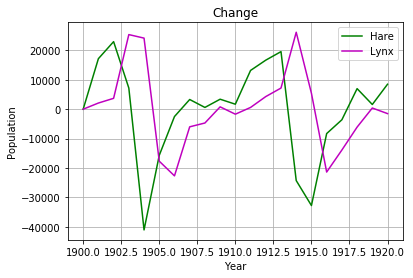

Correlation coefficient:    -0.1780243032713659


In [201]:
#Plot the change in hare population and the number of lynxes. Find the correlation coefficient.

new1 = np.insert(np.diff(data[:, 1]), 0, 0)
new2 = np.insert(np.diff(data[:, 2]), 0, 0)

plt.plot(data[:, 0], new1, label='Hare', c = 'g')
plt.plot(data[:, 0], new2, label='Lynx', c = 'm')

plt.legend(['Hare','Lynx'])
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Change')
plt.grid()
plt.show()

print ("Correlation coefficient:   ", np.corrcoef(data_change[:, 1], data_change[:, 2])[0, 1])

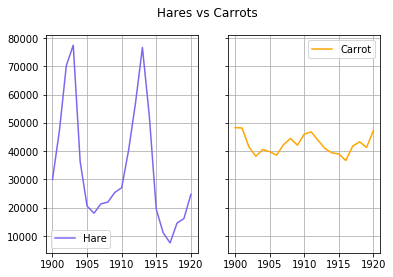

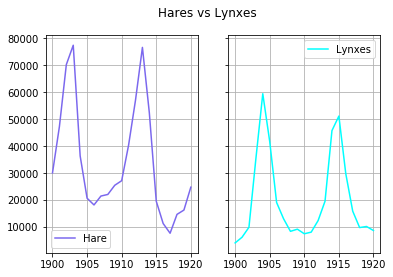

In [222]:
#Show population of hares vs carrots and hares vs lynxes.

fig, axs = plt.subplots(1, 2, sharey=True)
fig.suptitle('Hares vs Carrots')

axs[0].plot(data[:, 0], data[:, 1], label='Hare', color = "mediumslateblue")
axs[1].plot(data[:, 0], data[:, 3], label='Carrot', color="orange")

axs[0].legend()
axs[1].legend()
axs[0].grid(True)
axs[1].grid(True)

plt.show()

fig, axs = plt.subplots(1, 2, sharey=True)
fig.suptitle('Hares vs Lynxes')

axs[0].plot(data[:, 0], data[:, 1], label='Hare', color = "mediumslateblue")
axs[1].plot(data[:, 0], data[:, 2], label='Lynxes', color = "cyan")

axs[0].legend()
axs[1].legend()
axs[0].grid(True)
axs[1].grid(True)

plt.show()